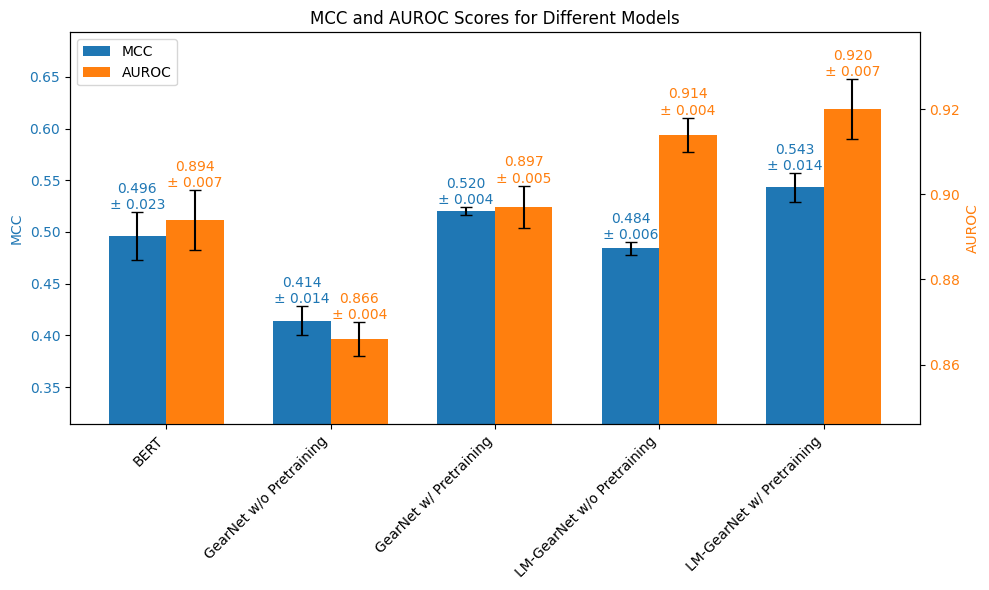

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['BERT', 'GearNet w/o Pretraining', 'GearNet w/ Pretraining',
          'LM-GearNet w/o Pretraining', 'LM-GearNet w/ Pretraining']
MCC = [0.496, 0.414, 0.520, 0.484, 0.543]
MCC_std = [0.023, 0.014, 0.004, 0.006, 0.014]
AUROC = [0.894, 0.866, 0.897, 0.914, 0.920]
AUROC_std = [0.007, 0.004, 0.005, 0.004, 0.007]

# Set the width of the bars
bar_width = 0.35

# Calculate the x positions for the groups
index = np.arange(len(models))

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MCC with error bars
bars1 = ax1.bar(index, MCC, bar_width, label='MCC',
                yerr=MCC_std, capsize=4, color='tab:blue')

# Set the y-axis labels for MCC
ax1.set_ylabel('MCC', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot AUROC with error bars
bars2 = ax2.bar(index + bar_width, AUROC, bar_width, label='AUROC',
                yerr=AUROC_std, capsize=4, color='tab:orange')

# Set the y-axis labels for AUROC
ax2.set_ylabel('AUROC', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set the x-axis labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models, rotation=45, ha='right')

# Set the chart title
ax1.set_title('MCC and AUROC Scores for Different Models')

# Set the y-axis limits for MCC and AUROC
ax1.set_ylim(min(MCC) - 0.1, max(MCC) + 0.15)
ax2.set_ylim(min(AUROC) - 0.02, max(AUROC) + 0.018)

# Get the legend handles and labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Merge the legend handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create a single legend
plt.legend(handles, labels, loc='upper left')

# Loop over the bars and place a label for each bar
for i, bar in enumerate(bars1):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + MCC_std[i],
             f"%.3f\n± {MCC_std[i]}" % yval, va='bottom', ha='center', color='tab:blue')

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval + AUROC_std[i],
             f"%.3f\n± {AUROC_std[i]}" % yval, va='bottom', ha='center', color='tab:orange')

# Display the chart
plt.tight_layout()
plt.show()
